# OSMI Survey: Time Dependent EDA

_By [Michael Rosenberg](mailto:mmrosenb@andrew.cmu.edu)._

_**Description**: Contains my plots that incorporate time as a factor for plotting._

_Last Updated: 5/1/2017 4:06 PM EST._

In [16]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

#helpers

%matplotlib inline
sns.set_style("dark")
sigLev = 3

In [17]:
#import dataset
timeDepFrame = pd.read_csv("../../data/processed/procTimeDataset.csv")

# Summary Statistics

In [18]:
timeCountFrame = timeDepFrame.groupby("year",as_index = False)["gender"].count()
timeCountFrame = timeCountFrame.rename(columns = {"gender":"count"})
display(timeCountFrame)

,year,count
0,2014,1254
1,2016,1429


_Table 1: Observations by year of our survey._

We see that while we have slightly more observations in 2016 than in 2014, we're talking about the difference of only a few dozen respondents. I would say that this is relatively balanced time-wise.

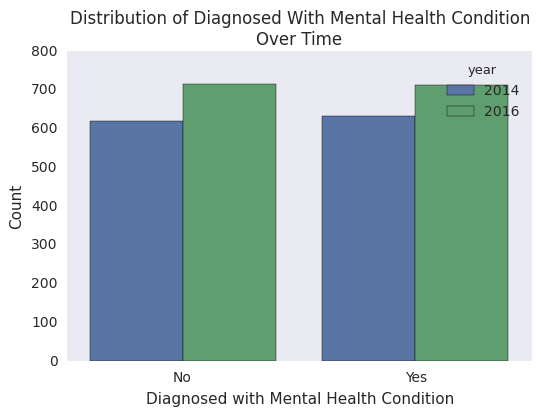

In [19]:
diagTimeCountFrame = timeDepFrame.groupby(["diagnosedWithMHD","year"],
                                as_index = False)["gender"].count()
diagTimeCountFrame = diagTimeCountFrame.rename(columns = {"gender":"count"})
sns.barplot(x = "diagnosedWithMHD",y = "count",hue = "year",
            data = diagTimeCountFrame)
plt.xlabel("Diagnosed with Mental Health Condition")
plt.ylabel("Count")
plt.title("Distribution of Diagnosed With Mental Health Condition\nOver Time")

_Figure 1: Distribution of Diagnosed with Mental Health Condition given Time._

We see that the balance looks to be the same between both $2014$ and $2016$, althought there are slightly more observations in $2016$ overall.

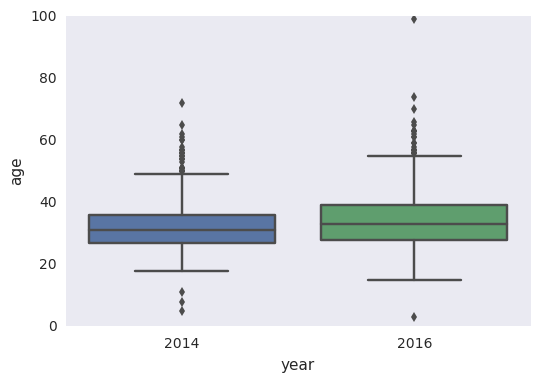

In [20]:
sns.boxplot(x = "year",y = "age",data = timeDepFrame)

_Figure 2: Distribution of Ages by Year._

We see that both IQRs look very similar to each other, although the $2016$ data happens to have a longer tail of ages than the $2014$ data.

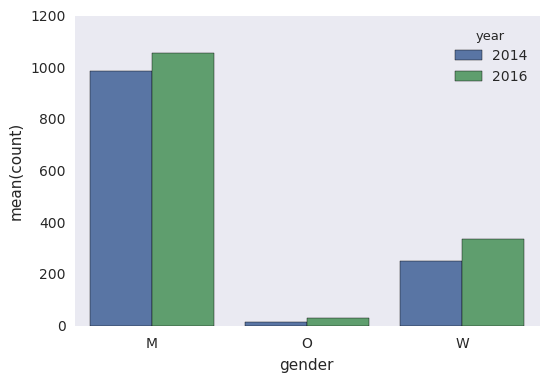

In [21]:
genderTimeCountFrame = timeDepFrame.groupby(["gender","year"],as_index = False)[
                                                "age"].count()
genderTimeCountFrame = genderTimeCountFrame.rename(columns = {"age":"count"})
sns.barplot(x = "gender",y = "count",hue = "year",data = genderTimeCountFrame)

_Figure 3: Distribution of encoded gender given time._

We see that the distribution relatively doesn't change much between $2014$ and $2016.$ Overall, we do see that men seem to dominate this distribution compared to individuals who identify as women or other genders.

In [23]:
sizeTimeCountFrame = timeDepFrame.groupby(["companySize","year"],
                                as_index = False)["gender"].count()
sizeTimeCountFrame = sizeTimeCountFrame.rename(columns={"gender":"count"})
#reorder for easier interpretation

       companySize  year  count
0              1-5  2014    160
1              1-5  2016     60
2          100-500  2014    176
3          100-500  2016    246
4           26-100  2014    288
5           26-100  2016    291
6         500-1000  2014     60
7         500-1000  2016     80
8             6-25  2014    289
9             6-25  2016    210
10  More than 1000  2014    281
11  More than 1000  2016    255
12   Self-Employed  2016    287


# Bivariate Relationships

# Interaction Effects